In [ ]:
import pandas as pd
df = pd.read_parquet("datasets/consolidated.parquet")
display(df)


,title,_int_0,_int_1,_int_2,_int_3,_int_4,_int_5,_int_6,_int_7,_int_8,...,_float_122,_float_123,_float_124,_float_125,_float_126,_float_127,_float_128,_float_129,_float_130,_float_131
0,! .. عشان ما تنضربش على قفاك,0,0,0,0,0,0,0,0,0,...,3.176471,3.176471,3.176471,3.176471,3.176471,3.176471,3.176471,3.176471,3.176471,3.176471
1,!!شعراء إرهابيون,0,0,0,0,0,0,0,0,0,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
2,!búscalo! (look it up!): a quick reference gui...,0,0,0,0,0,0,0,0,0,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
3,!exacto!: a practical guide to spanish grammar,0,0,0,0,0,0,0,0,0,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
4,!feliz navidad: celebrating a mexican christmas,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1486019,ｍな女王様と××したいってばよ [m na jousama to xx shitai tte...,0,0,0,0,0,0,0,0,0,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
1486020,ｍの劣情 [m no retsujou],0,0,0,0,0,0,0,0,0,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
1486021,ｓａｍｕｒａｉ ｄｅｅｐｅｒ ｋｙｏ（１）,0,0,0,0,0,0,0,0,0,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
1486022,ｘｂｌａｄｅ（１０）,0,0,0,0,0,0,0,0,0,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [2]:
import numpy as np
import pandas as pd
int_columns = [col for col in df.columns if col.startswith('_int_')]
float_columns = [col for col in df.columns if col.startswith('_float_')]

def replace_zero_with_nan_based_on_threshold(df, int_columns, float_columns, threshold=20):
    """
    Replace 0 with NaN in float columns where the corresponding _int_ column is below a threshold.
    
    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        int_columns (list): List of _int_ column names (cumulative review counts).
        float_columns (list): List of _float_ column names (e.g., ratings, slopes).
        threshold (int): Threshold below which to replace 0 with NaN.
    
    Returns:
        pd.DataFrame: Modified DataFrame with 0 replaced by NaN where applicable.
    """
    for int_col, float_col in zip(int_columns, float_columns):
        df[float_col] = df[float_col].where(~(df[int_col] < threshold) | (df[float_col] != 0), np.nan)
    
    return df

# Apply the function to both control_books and winner_row
df = replace_zero_with_nan_based_on_threshold(df, int_columns, float_columns, threshold=20)

display(df)



,title,_int_0,_int_1,_int_2,_int_3,_int_4,_int_5,_int_6,_int_7,_int_8,...,_float_122,_float_123,_float_124,_float_125,_float_126,_float_127,_float_128,_float_129,_float_130,_float_131
0,! .. عشان ما تنضربش على قفاك,0,0,0,0,0,0,0,0,0,...,3.176471,3.176471,3.176471,3.176471,3.176471,3.176471,3.176471,3.176471,3.176471,3.176471
1,!!شعراء إرهابيون,0,0,0,0,0,0,0,0,0,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
2,!búscalo! (look it up!): a quick reference gui...,0,0,0,0,0,0,0,0,0,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
3,!exacto!: a practical guide to spanish grammar,0,0,0,0,0,0,0,0,0,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
4,!feliz navidad: celebrating a mexican christmas,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,5.000000,5.000000,5.000000,5.000000,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1486019,ｍな女王様と××したいってばよ [m na jousama to xx shitai tte...,0,0,0,0,0,0,0,0,0,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
1486020,ｍの劣情 [m no retsujou],0,0,0,0,0,0,0,0,0,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
1486021,ｓａｍｕｒａｉ ｄｅｅｐｅｒ ｋｙｏ（１）,0,0,0,0,0,0,0,0,0,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
1486022,ｘｂｌａｄｅ（１０）,0,0,0,0,0,0,0,0,0,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [3]:
display(df["_float_100"])

0          3.176471
1          2.000000
2          4.000000
3          5.000000
4               NaN
             ...   
1486019    2.000000
1486020    3.000000
1486021         NaN
1486022         NaN
1486023         NaN
Name: _float_100, Length: 1486024, dtype: float32

In [4]:
int_columns = [col for col in df.columns if col.startswith('_int_')]
float_columns = [col for col in df.columns if col.startswith('_float_')]
df = df.drop(columns=int_columns)
display(df)

,title,_float_0,_float_1,_float_2,_float_3,_float_4,_float_5,_float_6,_float_7,_float_8,...,_float_122,_float_123,_float_124,_float_125,_float_126,_float_127,_float_128,_float_129,_float_130,_float_131
0,! .. عشان ما تنضربش على قفاك,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.176471,3.176471,3.176471,3.176471,3.176471,3.176471,3.176471,3.176471,3.176471,3.176471
1,!!شعراء إرهابيون,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
2,!búscalo! (look it up!): a quick reference gui...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
3,!exacto!: a practical guide to spanish grammar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
4,!feliz navidad: celebrating a mexican christmas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.000000,5.000000,5.000000,5.000000,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1486019,ｍな女王様と××したいってばよ [m na jousama to xx shitai tte...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
1486020,ｍの劣情 [m no retsujou],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
1486021,ｓａｍｕｒａｉ ｄｅｅｐｅｒ ｋｙｏ（１）,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
1486022,ｘｂｌａｄｅ（１０）,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [5]:
import pandas as pd
import numpy as np

def compute_lrc(df, k=4):
    x = np.arange(k)
    sum_x = x.sum()
    sum_x_sq = (x**2).sum()
    denominator = k * sum_x_sq - sum_x**2
    coeffs = (k * x - sum_x) / denominator
    coeffs = coeffs.astype(np.float32)
    print(coeffs)
    
    # Compute slopes for valid columns
    for i in range(k-1, 132):  # 132 = 131 + 1 (original max column)
        window_cols = [f'_float_{i - (k-1) + j}' for j in range(k)]
        df[f'_lrc_{i}'] = df[window_cols].dot(coeffs).astype('float32')
        if i%5 == 0:
            print(i)
    
    # Set first (k-1) columns to NaN
    for i in range(k-1):
        df[f'_lrc_{i}'] = np.nan
    
    return df

# Example usage
df = compute_lrc(df, k=6)  # 5-month window


[-0.14285715 -0.08571429 -0.02857143  0.02857143  0.08571429  0.14285715]
5


/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'_lrc_{i}'] = df[window_cols].dot(coeffs).astype('float32')
/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'_lrc_{i}'] = df[window_cols].dot(coeffs).astype('float32')
/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conc

10


/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'_lrc_{i}'] = df[window_cols].dot(coeffs).astype('float32')
/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'_lrc_{i}'] = df[window_cols].dot(coeffs).astype('float32')
/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conc

15


/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'_lrc_{i}'] = df[window_cols].dot(coeffs).astype('float32')
/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'_lrc_{i}'] = df[window_cols].dot(coeffs).astype('float32')
/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conc

20
25


/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'_lrc_{i}'] = df[window_cols].dot(coeffs).astype('float32')
/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'_lrc_{i}'] = df[window_cols].dot(coeffs).astype('float32')
/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conc

30
35


/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'_lrc_{i}'] = df[window_cols].dot(coeffs).astype('float32')
/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'_lrc_{i}'] = df[window_cols].dot(coeffs).astype('float32')
/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conc

40


/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'_lrc_{i}'] = df[window_cols].dot(coeffs).astype('float32')
/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'_lrc_{i}'] = df[window_cols].dot(coeffs).astype('float32')
/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conc

45


/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'_lrc_{i}'] = df[window_cols].dot(coeffs).astype('float32')
/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'_lrc_{i}'] = df[window_cols].dot(coeffs).astype('float32')
/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conc

50


/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'_lrc_{i}'] = df[window_cols].dot(coeffs).astype('float32')
/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'_lrc_{i}'] = df[window_cols].dot(coeffs).astype('float32')
/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conc

55


/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'_lrc_{i}'] = df[window_cols].dot(coeffs).astype('float32')
/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'_lrc_{i}'] = df[window_cols].dot(coeffs).astype('float32')
/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conc

60


/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'_lrc_{i}'] = df[window_cols].dot(coeffs).astype('float32')
/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'_lrc_{i}'] = df[window_cols].dot(coeffs).astype('float32')
/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conc

65
70


/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'_lrc_{i}'] = df[window_cols].dot(coeffs).astype('float32')
/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'_lrc_{i}'] = df[window_cols].dot(coeffs).astype('float32')
/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conc

75
80


/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'_lrc_{i}'] = df[window_cols].dot(coeffs).astype('float32')
/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'_lrc_{i}'] = df[window_cols].dot(coeffs).astype('float32')
/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conc

85


/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'_lrc_{i}'] = df[window_cols].dot(coeffs).astype('float32')
/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'_lrc_{i}'] = df[window_cols].dot(coeffs).astype('float32')
/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conc

90
95


/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'_lrc_{i}'] = df[window_cols].dot(coeffs).astype('float32')
/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'_lrc_{i}'] = df[window_cols].dot(coeffs).astype('float32')
/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conc

100
105


/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'_lrc_{i}'] = df[window_cols].dot(coeffs).astype('float32')
/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'_lrc_{i}'] = df[window_cols].dot(coeffs).astype('float32')
/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conc

110
115


/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'_lrc_{i}'] = df[window_cols].dot(coeffs).astype('float32')
/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'_lrc_{i}'] = df[window_cols].dot(coeffs).astype('float32')
/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conc

120
125


/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'_lrc_{i}'] = df[window_cols].dot(coeffs).astype('float32')
/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'_lrc_{i}'] = df[window_cols].dot(coeffs).astype('float32')
/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conc

130


/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'_lrc_{i}'] = df[window_cols].dot(coeffs).astype('float32')
/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'_lrc_{i}'] = df[window_cols].dot(coeffs).astype('float32')
/tmp/ipykernel_12367/3739512017.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conc

In [8]:
display(df)

,title,_float_0,_float_1,_float_2,_float_3,_float_4,_float_5,_float_6,_float_7,_float_8,...,_lrc_127,_lrc_128,_lrc_129,_lrc_130,_lrc_131,_lrc_0,_lrc_1,_lrc_2,_lrc_3,_lrc_4
0,! .. عشان ما تنضربش على قفاك,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN
1,!!شعراء إرهابيون,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.980232e-08,-2.980232e-08,-2.980232e-08,-2.980232e-08,-2.980232e-08,NaN,NaN,NaN,NaN,NaN
2,!búscalo! (look it up!): a quick reference gui...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-5.960464e-08,-5.960464e-08,-5.960464e-08,-5.960464e-08,-5.960464e-08,NaN,NaN,NaN,NaN,NaN
3,!exacto!: a practical guide to spanish grammar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN
4,!feliz navidad: celebrating a mexican christmas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1486019,ｍな女王様と××したいってばよ [m na jousama to xx shitai tte...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.980232e-08,-2.980232e-08,-2.980232e-08,-2.980232e-08,-2.980232e-08,NaN,NaN,NaN,NaN,NaN
1486020,ｍの劣情 [m no retsujou],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.980232e-08,2.980232e-08,2.980232e-08,2.980232e-08,2.980232e-08,NaN,NaN,NaN,NaN,NaN
1486021,ｓａｍｕｒａｉ ｄｅｅｐｅｒ ｋｙｏ（１）,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-5.960464e-08,-5.960464e-08,-5.960464e-08,-5.960464e-08,-5.960464e-08,NaN,NaN,NaN,NaN,NaN
1486022,ｘｂｌａｄｅ（１０）,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-5.960464e-08,-5.960464e-08,-5.960464e-08,-5.960464e-08,-5.960464e-08,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.to_parquet("datasets/pre_computed_slopes_scores.parquet")

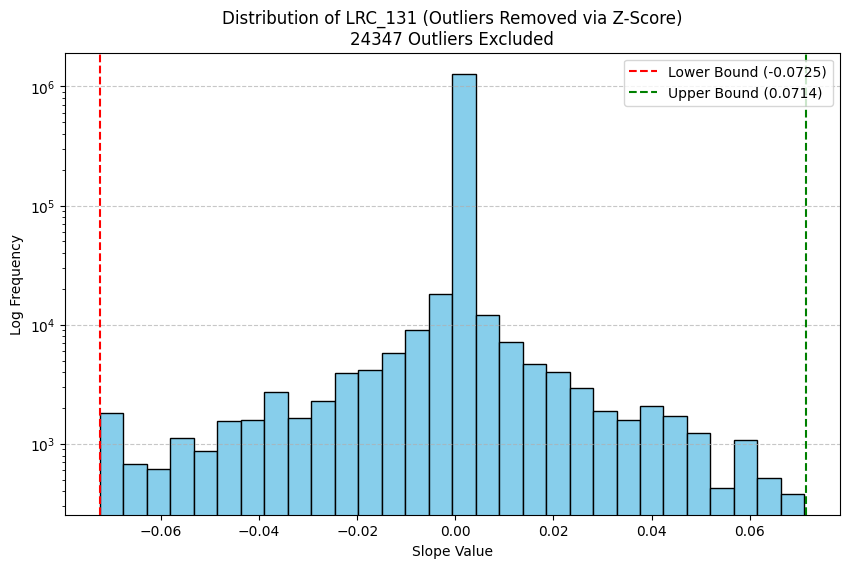

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Extract LRC_131 data and drop NaN values
lrc_data = df['_lrc_131'].dropna()

# Compute Z-scores
mean = lrc_data.mean()
std = lrc_data.std()
z_scores = (lrc_data - mean) / std

# Filter out outliers using Z-score threshold (e.g., |Z| > 3)
threshold = 3
filtered_data = lrc_data[(z_scores.abs() <= threshold)]

# Plot histogram with logarithmic y-axis
plt.figure(figsize=(10, 6))
plt.hist(filtered_data, bins=30, color='skyblue', edgecolor='black', log=True)

# Add labels and title
plt.title(f'Distribution of LRC_131 (Outliers Removed via Z-Score)\n{len(lrc_data) - len(filtered_data)} Outliers Excluded')
plt.xlabel('Slope Value')
plt.ylabel('Log Frequency')

# Add vertical lines for mean ± threshold*std
plt.axvline(mean - threshold * std, color='red', linestyle='--', label=f'Lower Bound ({mean - threshold * std:.4f})')
plt.axvline(mean + threshold * std, color='green', linestyle='--', label=f'Upper Bound ({mean + threshold * std:.4f})')

# Show plot
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()